<a href="https://colab.research.google.com/github/mot1122/CNN_model/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib
import cv2
from PIL import Image

In [2]:
cp /content/drive/MyDrive/sample.png .

# opencv, pillお試し

In [3]:
img=cv2.imread("sample.png")

In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(512, 512, 3)

In [6]:
img.dtype

dtype('uint8')

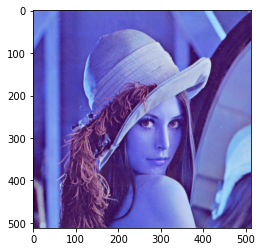

In [7]:
plt.imshow(img)

In [8]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

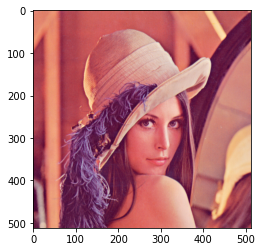

In [9]:
plt.imshow(img_rgb)

In [10]:
img=Image.open("sample.png")

In [11]:
type(img)

PIL.PngImagePlugin.PngImageFile

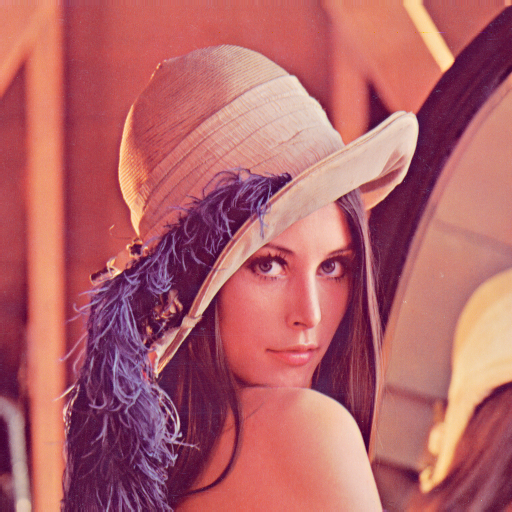

In [12]:
img

In [13]:
img= np.array(img)

In [14]:
type(img)

numpy.ndarray

In [15]:
img.shape

(512, 512, 3)

In [16]:
img.dtype

dtype('uint8')

# グレースケール変換

In [17]:
img=cv2.imread("sample.png")

In [18]:
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

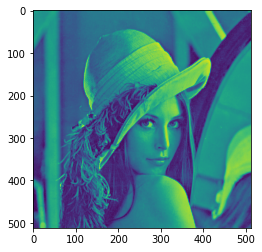

In [19]:
plt.imshow(img_gray)

In [20]:
img.shape

(512, 512, 3)

In [21]:
img_gray.shape

(512, 512)

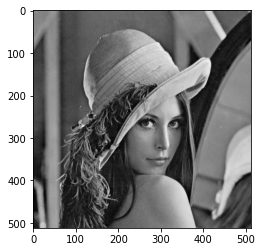

In [22]:
plt.imshow(img_gray,cmap="gray")

# エッジ検出

In [23]:
kernel=np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1]
])

In [24]:
img_conv=cv2.filter2D(img_gray,-1,kernel)

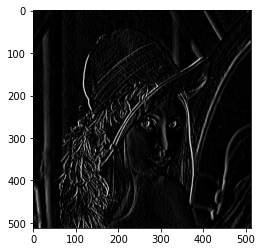

In [25]:
plt.imshow(img_conv,cmap="gray")

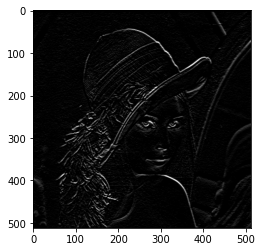

In [26]:
kernel=np.array([
    [-1,-1,-1],
    [0,0,0],
    [1,1,1]
])
img_conv=cv2.filter2D(img_gray,-1,kernel)
plt.imshow(img_conv,cmap="gray")

# MNIST using CNN

In [27]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11714674876689688415
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11320098816
locality {
  bus_id: 1
  links {
  }
}
incarnation: 59039182056238149
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
xla_global_id: 416903419
]


In [28]:
from tensorflow.keras.datasets import mnist

In [29]:
train,test=mnist.load_data()

In [30]:
len(train)

2

In [31]:
type(train[0])

numpy.ndarray

In [32]:
train[0].shape

(60000, 28, 28)

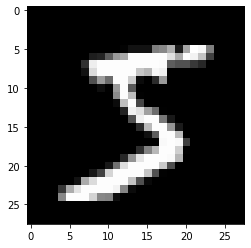

In [33]:
img=train[0][0]
plt.imshow(img,cmap="gray")

In [34]:
train[1].shape

(60000,)

In [35]:
train[1]

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [36]:
X_train,y_train=train
X_test,y_test=test

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_train=X_train.reshape(60000, 28, 28,1)/255
X_test=X_test.reshape(10000, 28, 28,1)/255

In [40]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [41]:
X_train.dtype, X_test.dtype

(dtype('float64'), dtype('float64'))

In [42]:
y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'))

In [43]:
X_train, X_test=X_train.astype("float32"), X_test.astype("float32")
y_train, y_test=y_train.astype("int32"), y_test.astype("int32")

In [44]:
import os,random

In [45]:
def reset_seed(seed=0):
  os.environ["PYTHONHASHSEED"]="0"
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)

In [46]:
from tensorflow.keras import models,layers

In [47]:
reset_seed(0)
model=models.Sequential([
  layers.Conv2D(filters=3,kernel_size=(3,3),activation="relu",input_shape=(28, 28,1)),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(100,activation="relu"),
  layers.Dense(10,activation="softmax")
])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 3)         30        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 3)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 507)               0         
                                                                 
 dense (Dense)               (None, 100)               50800     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 51,840
Trainable params: 51,840
Non-trainable params: 0
____________________________________________________

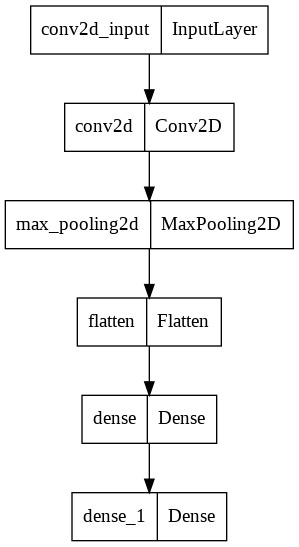

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [50]:
optimizer=tf.keras.optimizers.Adam(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [51]:
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [52]:
batch_size=4096*4
epochs=30
history=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
4/4 [==============================] - 10s 319ms/step - loss: 1.8441 - accuracy: 0.4709 - val_loss: 0.8979 - val_accuracy: 0.7659
Epoch 2/30
4/4 [==============================] - 0s 86ms/step - loss: 0.7292 - accuracy: 0.7848 - val_loss: 0.4818 - val_accuracy: 0.8490
Epoch 3/30
4/4 [==============================] - 0s 86ms/step - loss: 0.4742 - accuracy: 0.8532 - val_loss: 0.4160 - val_accuracy: 0.8820
Epoch 4/30
4/4 [==============================] - 0s 89ms/step - loss: 0.4025 - accuracy: 0.8849 - val_loss: 0.3635 - val_accuracy: 0.9009
Epoch 5/30
4/4 [==============================] - 0s 82ms/step - loss: 0.3538 - accuracy: 0.9005 - val_loss: 0.3260 - val_accuracy: 0.9082
Epoch 6/30
4/4 [==============================] - 0s 85ms/step - loss: 0.3152 - accuracy: 0.9091 - val_loss: 0.2956 - val_accuracy: 0.9138
Epoch 7/30
4/4 [==============================] - 0s 82ms/step - loss: 0.2862 - accuracy: 0.9160 - val_loss: 0.2612 - val_accuracy: 0.9234
Epoch 8/30
4/4 [=========

In [53]:
!nvidia-smi

Thu Mar  3 18:24:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0   129W / 149W |   2329MiB / 11441MiB |     25%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [54]:
results=pd.DataFrame(history.history)

In [55]:
results.tail(5)

,loss,accuracy,val_loss,val_accuracy
25,0.094136,0.971867,0.103374,0.9674
26,0.090608,0.973033,0.102677,0.9684
27,0.087285,0.974100,0.099557,0.9693
28,0.083940,0.974867,0.097121,0.9704
29,0.081198,0.975700,0.095150,0.9714


Text(0.5, 0, 'epochs')

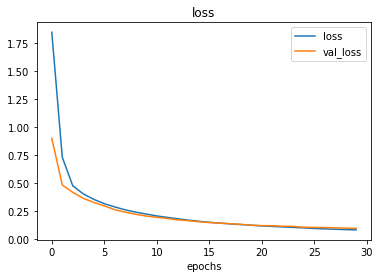

In [56]:
results[["loss","val_loss"]].plot(title="loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

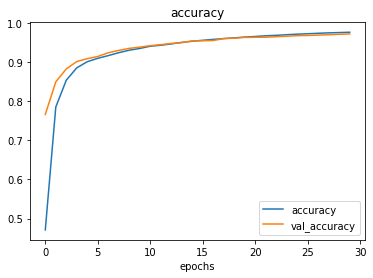

In [57]:
results[["accuracy","val_accuracy"]].plot(title="accuracy")
plt.xlabel("epochs")

In [58]:
X_sample=np.array([X_train[0]])
X_sample.shape

(1, 28, 28, 1)

In [59]:
model.layers

In [60]:
model.layers[0].get_weights()

[array([[[[-0.48743027, -0.5190254 ,  0.18080452]],
 
         [[ 0.16768728, -0.13356192,  0.40031636]],
 
         [[ 0.27885848,  0.46797496,  0.23750852]]],
 
 
        [[[-0.5635615 ,  0.03468545,  0.2603417 ]],
 
         [[-0.06071914, -0.04790065,  0.07929767]],
 
         [[ 0.38818806,  0.41954163,  0.21281818]]],
 
 
        [[[ 0.1049667 , -0.26684925, -0.16123283]],
 
         [[-0.67053914,  0.29282963,  0.28498542]],
 
         [[ 0.2794253 ,  0.06470225,  0.28770274]]]], dtype=float32),
 array([0.08548115, 0.04860646, 0.0829467 ], dtype=float32)]

In [61]:
output=model.layers[0](X_sample)
output=output[0].numpy()
output.shape

(26, 26, 3)

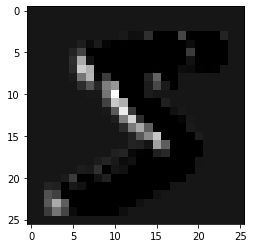

In [62]:
plt.imshow(output[:,:,0],cmap="gray")

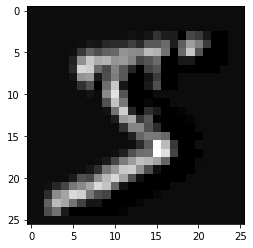

In [63]:
plt.imshow(output[:,:,1],cmap="gray")

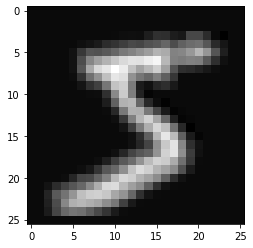

In [64]:
plt.imshow(output[:,:,2],cmap="gray")

In [65]:
output=model.layers[0](X_sample)
output=model.layers[1](output)
output=output[0].numpy()

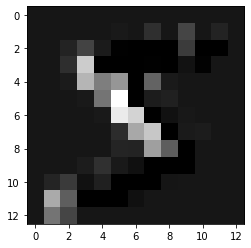

In [66]:
plt.imshow(output[:,:,0],cmap="gray")

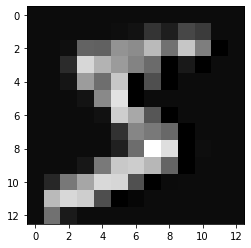

In [67]:
plt.imshow(output[:,:,1],cmap="gray")

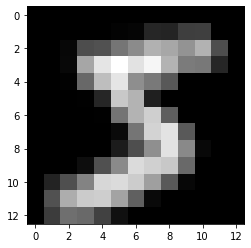

In [68]:
plt.imshow(output[:,:,2],cmap="gray")

In [69]:
output=model.layers[0](X_sample)
output=model.layers[1](output)
output=model.layers[2](output)
output=output[0].numpy()

In [70]:
output.shape

(507,)

# Fine Tuning
## Baseline

In [71]:
train,test=tf.keras.datasets.cifar10.load_data()

In [72]:
train[0].shape, train[1].shape

((50000, 32, 32, 3), (50000, 1))

In [73]:
test[0].shape, test[1].shape

((10000, 32, 32, 3), (10000, 1))

In [74]:
X_train,y_train=train
X_test,y_test=test

In [75]:
X_train,X_test=X_train/255,X_test/255

In [76]:
X_train,y_train=X_train.astype("float32"),y_train.astype("float32")
X_test,y_test=X_test.astype("int32"),y_test.astype("int32"),

In [77]:
reset_seed(0)
model=models.Sequential([
  layers.Conv2D(filters=3,kernel_size=(3,3),activation="relu",input_shape=(32, 32, 3)),
  layers.MaxPool2D(pool_size=(2,2)),
  layers.Flatten(),
  layers.Dense(100,activation="relu"),
  layers.Dense(10,activation="softmax")                       
])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 3)         84        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 3)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 675)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               67600     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 68,694
Trainable params: 68,694
Non-trainable params: 0
__________________________________________________

In [79]:
optimizer=tf.keras.optimizers.Adam(lr=0.01)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [80]:
model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [81]:
batch_size=4096
epochs=30
history=model.fit(X_train,y_train,
                  batch_size=batch_size,epochs=epochs,
                  validation_data=(X_test,y_test))

Epoch 1/30
13/13 [==============================] - 2s 82ms/step - loss: 2.1485 - accuracy: 0.2161 - val_loss: 2.6644 - val_accuracy: 0.1194
Epoch 2/30
13/13 [==============================] - 1s 51ms/step - loss: 1.8588 - accuracy: 0.3520 - val_loss: 3.0798 - val_accuracy: 0.1212
Epoch 3/30
13/13 [==============================] - 1s 52ms/step - loss: 1.6778 - accuracy: 0.4046 - val_loss: 3.6644 - val_accuracy: 0.1137
Epoch 4/30
13/13 [==============================] - 1s 51ms/step - loss: 1.5715 - accuracy: 0.4382 - val_loss: 3.9014 - val_accuracy: 0.1116
Epoch 5/30
13/13 [==============================] - 1s 52ms/step - loss: 1.4942 - accuracy: 0.4676 - val_loss: 3.8530 - val_accuracy: 0.1125
Epoch 6/30
13/13 [==============================] - 1s 51ms/step - loss: 1.4464 - accuracy: 0.4842 - val_loss: 3.9197 - val_accuracy: 0.1164
Epoch 7/30
13/13 [==============================] - 1s 57ms/step - loss: 1.4007 - accuracy: 0.5018 - val_loss: 3.9994 - val_accuracy: 0.1140
Epoch 8/30
13

In [82]:
!nvidia-smi

Thu Mar  3 18:25:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    90W / 149W |   2329MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## FIne tuned VGG16

In [83]:
from tensorflow.keras.applications import resnet,VGG16

In [84]:
base_model=VGG16(input_shape=(224,224,3),include_top=False,weights="imagenet")

In [85]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [86]:
train_choice=np.random.randint(low=0,high=50000,size=5000)
test_choice=np.random.randint(low=0,high=10000,size=2500)

In [87]:
X_train,y_train=train
X_test,y_test=test

In [88]:
X_train,y_train=X_train[train_choice],y_train[train_choice].astype("int32")
X_test,y_test=X_test[test_choice],y_test[test_choice].astype("int32")

In [89]:
_train,_test=[],[]
for img in X_train:
  _train.append(cv2.resize(src=img,dsize=(224,224)))
for img in X_test:
  _test.append(cv2.resize(src=img,dsize=(224,224)))

In [90]:
X_train=np.array(_train,dtype="float32")/255
X_test=np.array(_test,dtype="float32")/255

In [91]:
X_train.shape,X_test.shape

((5000, 224, 224, 3), (2500, 224, 224, 3))

In [93]:
reset_seed(0)
finetuned_model=models.Sequential([
  base_model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(512,activation="relu"),
  layers.Dense(10,activation="softmax")
])

In [94]:
optimizer=tf.keras.optimizers.SGD(lr=0.01)
finetuned_model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [95]:
finetuned_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14,982,474
Trainable params: 14,982,474
Non-trainable params: 0
_________________________________________________________________


In [96]:
loss,accuracy=finetuned_model.evaluate(X_test,y_test)

79/79 [==============================] - 29s 306ms/step - loss: 2.4562 - accuracy: 0.0964


In [97]:
print(f"loss:{loss},accuracy:{accuracy}")

loss:2.456188201904297,accuracy:0.09640000015497208


In [ ]:
history=finetuned_model.fit(X_train,y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_test,y_test))

In [ ]:
results=pd.DataFrame(history.history)
results.tail(5)

In [ ]:
results[["loss","val_loss"]].plot(title="loss")
plt.xlabel("epochs")

In [ ]:
results[["accuracy","accuracy_loss"]].plot(title="accuracy")
plt.xlabel("epochs")